<a href="https://colab.research.google.com/github/AndreesBenitoo/practicaMCP_rinconbenito/blob/main/ataques_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA 1: PROTEGIENDO LA ETSISI DE ATAQUES DE RED

## Enunciado Problema 1
En este apartado se proporciona un dataset “trazas_red.csv” de trazas de ataques de red
categorizadas. Para cada traza se indica el tipo de ataque de red detectado con una etiqueta en la
columna “label”.
Se pide lo siguiente:
1. Realiza un estudio cualitativo del dataset, describiendo lo máximo posible qué son las
diferentes características y tipos de ataque de red. Es importante que, dado que existen
muchos tipos de ataque, puedas agruparlos para lograr mejores explicaciones de los datos
2. Realiza un estudio cuantitativo de las características del dataset, indicando si existen variables con alta correlación
3. Haz uso de técnicas de reducción de dimensionalidad para lograr visualizaciones que
permitan entender los datos. El objetivo fundamental es lograr visualizaciones que mejor
consigan separar los diferentes tipos de ataque de red entre si.
4. Haz uso de técnicas de reducción de dimensionalidad para lograr una mejor clasificación
de las trazas de red. Realiza una comparación exhaustiva contra diferentes clasificadores
de scikit-learn, evaluando si permiten lograr mejores resultados

# Resolución de la práctica

## Apartado 1: Estudio cualitativo del dataset

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("./data/trazas_red.csv")

In [72]:
df.columns

Index(['IRC', 'Telnet', 'DHCP', 'Rate', 'psh_flag_number', 'IPv', 'ARP',
       'ack_flag_number', 'HTTPS', 'LLC', 'ICMP', 'Tot size', 'Radius',
       'Protocol Type', 'Weight', 'rst_count', 'syn_count', 'UDP', 'fin_count',
       'Magnitue', 'Number', 'syn_flag_number', 'cwr_flag_number', 'Srate',
       'urg_count', 'Tot sum', 'ack_count', 'Std', 'fin_flag_number', 'Max',
       'Header_Length', 'TCP', 'ece_flag_number', 'Min', 'SSH', 'Drate',
       'SMTP', 'AVG', 'DNS', 'HTTP', 'rst_flag_number', 'IAT', 'Covariance',
       'Duration', 'flow_duration', 'Variance', 'label'],
      dtype='object')

In [73]:
df['label'].value_counts().shape

(34,)

Vamos a ver, lo primero de todo, los ataques que nos vamos a encontrar para poder analizar y estudiar el dataset

In [74]:
df.label.unique().tolist()

['Mirai-greeth_flood',
 'DDoS-PSHACK_Flood',
 'Mirai-greip_flood',
 'DoS-SYN_Flood',
 'DoS-UDP_Flood',
 'DDoS-ICMP_Flood',
 'DDoS-RSTFINFlood',
 'DDoS-UDP_Flood',
 'DoS-TCP_Flood',
 'DDoS-SYN_Flood',
 'DDoS-TCP_Flood',
 'Mirai-udpplain',
 'DDoS-ICMP_Fragmentation',
 'VulnerabilityScan',
 'DDoS-UDP_Fragmentation',
 'DDoS-SynonymousIP_Flood',
 'DDoS-ACK_Fragmentation',
 'MITM-ArpSpoofing',
 'BenignTraffic',
 'CommandInjection',
 'Recon-PortScan',
 'DNS_Spoofing',
 'Recon-HostDiscovery',
 'Recon-OSScan',
 'DDoS-SlowLoris',
 'DoS-HTTP_Flood',
 'BrowserHijacking',
 'DictionaryBruteForce',
 'SqlInjection',
 'DDoS-HTTP_Flood',
 'Backdoor_Malware',
 'XSS',
 'Uploading_Attack',
 'Recon-PingSweep']

### ESTUDIO DE TODAS LAS 'LABEL' EN PROFUNDIDAD
#### MIRAI
- **Mirai GRE ETH Flood**: es un tipo de ataque DDoS en el cual la *botnet Mirai* utiliza el protocolo **Generic Routing Encapsulation** (GRE) para encapsular tráfico Ethernet. En un ataque de este tipo, los dispositivos IoT comprometidos, conocidos como **'bots'**, envían grandes volúmenes de paquetes GRE que contienen información Ethernet al objetivo, inundando la red con datos y generando una *sobrecarga en los servidores*. Este tipo de tráfico GRE puede usarse para realizar túneles y, al ser encapsulado de esta manera, se hace más difícil de filtrar, lo que lo convierte en una técnica efectiva para **saturar los recursos del servidor**.

- **Mirai GRE IP Flood**: también utiliza el protocolo GRE, pero en este caso los paquetes encapsulados son paquetes IP. En este ataque, los bots envían un gran volumen de paquetes GRE que contienen 'tráfico IP' al servidor objetivo. Al encapsular paquetes IP en paquetes GRE, se puede lograr una amplificación en el tráfico que resulta más difícil de gestionar para los dispositivos de seguridad y para el servidor atacado, causando un colapso de la red y denegando el acceso a tráfico legítimo.

- **Mirai UDP Plain**: es un tipo de ataque UDP Flood, donde la botnet envía una gran cantidad de paquetes UDP (User Datagram Protocol) al objetivo, sobrecargando el puerto de destino. Estos ataques se realizan sin encapsulación adicional, de ahí el término "plain" (que significa "simple" o "sin adornos"). El propósito es inundar al servidor con tantos paquetes que se vea incapaz de responder a las solicitudes legítimas, lo cual resulta en una denegación de servicio. Este tipo de ataque es especialmente efectivo contra servidores que no tienen protección específica para gestionar grandes cantidades de paquetes UDP.
#### DOS - DDOS - DoS
- **DoS SYN Flood**: Es un tipo de ataque de denegación de servicio (DoS) que se aprovecha del proceso de establecimiento de una conexión TCP para consumir los recursos del servidor, impidiendo que pueda responder a solicitudes legítimas. Durante un ataque de inundación SYN, el atacante, utilizando un único dispositivo, envía un gran número de paquetes SYN (paquetes que normalmente se usan para solicitar una conexión) al servidor objetivo.

- **DDoS SYN Flood**: es un tipo de ataque de denegación de servicio distribuido (DDoS) que se aprovecha del proceso de establecimiento de una conexión TCP para consumir los recursos del servidor, impidiendo que pueda responder a solicitudes legítimas. Durante un ataque de inundación SYN, el atacante envía un gran número de paquetes SYN (paquetes que normalmente se usan para solicitar una conexión) al servidor objetivo.

- **DoS UDP Flood**: Es un tipo de ataque de denegación de servicio (DoS) que utiliza el protocolo UDP (User Datagram Protocol) para sobrecargar los recursos del servidor objetivo. En un ataque de inundación UDP, el atacante, utilizando un único dispositivo, envía un gran volumen de paquetes UDP a puertos específicos del servidor con el propósito de consumir sus recursos y provocar que no pueda procesar solicitudes legítimas, resultando en una denegación de servicio.

- **DDoS UDP Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza el protocolo UDP (User Datagram Protocol) para consumir los recursos del servidor objetivo. Durante un ataque de inundación UDP, múltiples dispositivos comprometidos, generalmente pertenecientes a una botnet, envían simultáneamente grandes volúmenes de paquetes UDP al servidor objetivo, haciendo que éste no pueda responder a solicitudes legítimas, causando una denegación de servicio.

- **DoS TCP Flood**: Es un tipo de ataque de denegación de servicio (DoS) que se basa en enviar una gran cantidad de paquetes TCP al servidor objetivo con el fin de consumir sus recursos y provocar que no pueda responder a las solicitudes legítimas. En un ataque de inundación TCP, el atacante, utilizando un único dispositivo, envía numerosos paquetes TCP al servidor para saturar su capacidad de procesamiento y memoria, lo que lleva a una denegación de servicio.

- **DDoS TCP Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que se basa en el envío masivo de paquetes TCP para consumir los recursos del servidor objetivo. En un ataque de inundación TCP, múltiples dispositivos comprometidos, generalmente pertenecientes a una botnet, envían grandes volúmenes de paquetes TCP al servidor simultáneamente, lo que resulta en una saturación de los recursos del servidor y en la imposibilidad de atender solicitudes legítimas, provocando una denegación de servicio.

- **DoS HTTP Flood**: Es un tipo de ataque de denegación de servicio (DoS) que utiliza solicitudes HTTP para sobrecargar los recursos del servidor objetivo. Durante un ataque de inundación HTTP, el atacante, utilizando un único dispositivo, envía un gran número de solicitudes HTTP al servidor con el propósito de consumir su capacidad de procesamiento y memoria, lo que provoca que el servidor no pueda atender solicitudes legítimas y resulte en una denegación de servicio.

- **DDoS HTTP Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza solicitudes HTTP para consumir los recursos del servidor objetivo. En un ataque de inundación HTTP, múltiples dispositivos comprometidos, usualmente parte de una botnet, envían grandes volúmenes de solicitudes HTTP al servidor al mismo tiempo, haciendo que el servidor se sature y no pueda responder a las solicitudes legítimas, resultando en una denegación de servicio.

- **DDoS PSH-ACK Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza paquetes TCP con las banderas PSH (Push) y ACK (Acknowledgment) activadas para consumir los recursos del servidor objetivo. Durante un ataque de inundación PSH-ACK, múltiples dispositivos comprometidos (botnets) envían simultáneamente un gran volumen de paquetes PSH-ACK al servidor, saturando su capacidad de procesamiento y recursos, lo cual impide que el servidor pueda responder a solicitudes legítimas, provocando una denegación de servicio.

- **DDoS ICMP Fragmentation Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza la fragmentación de paquetes ICMP (Internet Control Message Protocol) para sobrecargar los recursos del servidor objetivo. Durante un ataque de fragmentación ICMP, múltiples dispositivos comprometidos (botnets) envían grandes volúmenes de fragmentos ICMP falsos que no se pueden ensamblar. El servidor objetivo intenta almacenar y procesar estos fragmentos, lo que consume su memoria y recursos hasta provocar una denegación de servicio, haciendo que el servidor no pueda responder al tráfico legítimo.

- **DDoS UDP Fragmentation Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza la fragmentación de paquetes UDP (User Datagram Protocol) para sobrecargar los recursos del servidor objetivo. Durante un ataque de fragmentación UDP, múltiples dispositivos comprometidos envían fragmentos de paquetes UDP del tamaño máximo permitido hacia el servidor, saturando su capacidad para reensamblar los paquetes y consumir sus recursos. Esto lleva al servidor a quedarse sin recursos o a provocar un desbordamiento de los canales, haciendo que no pueda responder al tráfico legítimo, resultando en una denegación de servicio.

- **DDoS ACK Fragmentation Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza la fragmentación de paquetes TCP ACK (Acknowledgement) para sobrecargar los recursos del servidor objetivo. En un ataque de inundación ACK fragmentado, múltiples dispositivos comprometidos (botnets) envían simultáneamente un gran volumen de paquetes ACK fragmentados al servidor objetivo. Estos paquetes requieren que el servidor emplee recursos significativos para su reensamblaje, lo que provoca el agotamiento de la CPU, la memoria y el ancho de banda del servidor. Como resultado, el servidor queda incapaz de manejar nuevas solicitudes legítimas, provocando una denegación de servicio.

- **DDoS Synonymous IP Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza paquetes TCP SYN con la misma dirección IP de origen y destino, correspondiente a la dirección del servidor objetivo. Durante un ataque de inundación de IP sinónima, múltiples dispositivos comprometidos envían simultáneamente un gran volumen de paquetes SYN con direcciones idénticas, haciendo que el servidor consuma sus recursos al intentar procesar cada solicitud. Esto resulta en el agotamiento de los recursos del servidor, dejándolo incapaz de responder a solicitudes legítimas y provocando una denegación de servicio.

- **DDoS ICMP Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza paquetes ICMP (Internet Control Message Protocol) para sobrecargar los recursos del servidor objetivo. Durante un ataque de inundación ICMP, múltiples dispositivos comprometidos (botnets) envían simultáneamente un gran volumen de solicitudes ICMP, como los mensajes de "ping", al servidor, haciendo que se sature su ancho de banda y sus recursos de procesamiento. Esto provoca que el servidor no pueda atender solicitudes legítimas, resultando en una denegación de servicio.

- **DDoS RST-FIN Flood**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que utiliza paquetes RST (Reset) y FIN (Finish) para sobrecargar los recursos del servidor objetivo. Durante un ataque de inundación RST-FIN, múltiples dispositivos comprometidos (botnets) envían simultáneamente un gran volumen de paquetes RST o FIN falsificados al servidor a alta velocidad. Estos paquetes no están relacionados con ninguna de las sesiones existentes del servidor, lo cual obliga al servidor a destinar una cantidad significativa de recursos para intentar emparejarlos con las conexiones actuales. Esto provoca una degradación del rendimiento del servidor, una reducción de la capacidad de procesamiento y la inaccesibilidad parcial del servicio, resultando en una denegación de servicio para los usuarios legítimos.

- **DDoS Slowloris**: Es un tipo de ataque de denegación de servicio distribuido (DDoS) que se dirige a la capa 7 del modelo OSI, diseñado para agotar los recursos del servidor objetivo mediante múltiples conexiones TCP abiertas de forma simultánea y persistente. En un ataque DDoS Slowloris, múltiples dispositivos comprometidos (botnets) abren conexiones al servidor y envían solicitudes HTTP de manera lenta y prolongada para mantener las conexiones activas tanto tiempo como sea posible. Al mantener abiertas una gran cantidad de conexiones simultáneas, el servidor objetivo se queda sin recursos para procesar nuevas solicitudes legítimas, lo que resulta en una denegación de servicio.
#### RECON
- **Recon OS Scan**: Es un tipo de escaneo de reconocimiento que se lleva a cabo para identificar el sistema operativo del dispositivo o servidor objetivo. Durante un escaneo de Recon OS, el atacante o analista de seguridad utiliza herramientas como nmap para enviar paquetes específicos y analizar las respuestas del sistema objetivo. Estas respuestas permiten determinar características que identifican el sistema operativo, como su tipo y versión. Esta información es crucial para evaluar la infraestructura de seguridad y encontrar posibles vulnerabilidades que puedan ser explotadas o para implementar medidas de defensa más efectivas.

- **Recon Port Scan**: Es un tipo de escaneo de reconocimiento que se utiliza para identificar los puertos abiertos y los servicios que se ejecutan en un servidor o dispositivo objetivo. Durante un escaneo de puertos de reconocimiento, el atacante o analista de seguridad utiliza herramientas como nmap para enviar solicitudes a cada uno de los puertos del objetivo y observar cuáles responden. Los puertos abiertos indican qué servicios o aplicaciones están disponibles y ejecutándose en el dispositivo, proporcionando una visión detallada de la infraestructura. Esta información puede ser utilizada tanto para evaluar la seguridad del sistema y protegerlo como para identificar posibles vulnerabilidades y explotarlas.

- **Recon Host Discovery**: Es un tipo de escaneo de reconocimiento utilizado para identificar qué dispositivos están activos en una red determinada. Durante un escaneo de descubrimiento de hosts, el atacante o analista de seguridad utiliza herramientas como nmap para enviar paquetes de diversos tipos (por ejemplo, ICMP, TCP, o UDP) a una serie de direcciones IP para determinar cuáles de ellas responden. Los hosts que responden son considerados dispositivos activos en la red y, por lo tanto, potenciales objetivos para un análisis más detallado. Este tipo de reconocimiento es fundamental para mapear la red, identificar los sistemas presentes y planificar futuras acciones de evaluación de seguridad o de ataque.

- **Recon Ping Sweep**: Es un tipo de escaneo de reconocimiento que se utiliza para identificar los hosts activos en una red mediante el uso de paquetes ICMP (echo/reply), comúnmente conocidos como "ping". Durante un ping sweep, el analista de seguridad o atacante envía una serie de pings a todas las posibles direcciones IP de un rango de red para determinar cuáles responden. Los hosts que responden se consideran activos y accesibles, proporcionando un mapa inicial de la red. Este proceso permite identificar rápidamente qué dispositivos están disponibles en una red determinada, siendo un primer paso clave para mapear la infraestructura y planificar futuros análisis de vulnerabilidades o ataques.
#### OTHER
- **Vulnerability Scan**: Es un tipo de escaneo de reconocimiento utilizado para detectar vulnerabilidades en la infraestructura de TI de una organización, incluidos sistemas, redes y aplicaciones. Durante un vulnerability scan, se emplean herramientas automatizadas que identifican posibles debilidades al comparar configuraciones de sistemas, versiones de software y ajustes de red con una base de datos de vulnerabilidades conocidas. Este proceso ayuda a descubrir fallos de seguridad, software desactualizado, configuraciones incorrectas y puertos abiertos innecesarios, permitiendo a las organizaciones identificar y corregir proactivamente los puntos débiles antes de que puedan ser explotados por atacantes. Este tipo de escaneo es fundamental en la gestión de ciberseguridad para minimizar riesgos, cumplir con normativas y fortalecer la protección contra amenazas.

- **MITM ARP Spoofing**: Es un tipo de ataque de intermediario (Man-in-the-Middle) que utiliza el Protocolo de Resolución de Direcciones (ARP) para interceptar las comunicaciones entre dispositivos en una red local. En un ataque de ARP Spoofing, el atacante envía respuestas ARP falsas a los dispositivos de la red, haciéndose pasar por otro dispositivo (por ejemplo, el router o gateway), de modo que las comunicaciones entre los dispositivos objetivo sean redirigidas a través del atacante. Esto le permite interceptar, alterar o incluso redirigir el tráfico a otro destino. Este tipo de ataque explota la falta de autenticación del protocolo ARP, lo que lo convierte en una herramienta común para interceptar datos, secuestrar sesiones activas y manipular la información en tránsito.

- **Benign Traffic**: Es un tipo de tráfico de red que se considera legítimo y no malicioso. Durante la transmisión de tráfico benigno, los dispositivos se comunican de forma normal y autorizada, realizando funciones habituales como la navegación web, el envío de correos electrónicos, la transferencia de archivos o el uso de servicios de red como DNS y autenticación. El tráfico benigno no representa una amenaza para la seguridad de la red o del sistema y se diferencia del tráfico malicioso, que busca comprometer la seguridad o integridad de los recursos de la red.

- **Command Injection**: Es un tipo de vulnerabilidad que permite a un atacante inyectar y ejecutar comandos directamente en el sistema operativo en el que se ejecuta una aplicación. Durante un ataque de Command Injection, el atacante explota fallas en la validación de entradas para ejecutar comandos arbitrarios, utilizando funciones del sistema que permiten el acceso directo, como exec(). Esto puede llevar a graves riesgos para la empresa, como el robo de credenciales, el despliegue de malware en el servidor, o incluso la obtención de privilegios de administrador, lo que otorga el control total del sistema. Este tipo de vulnerabilidad es una de las más peligrosas ya que permite al atacante realizar cualquier acción que el sistema operativo pueda ejecutar.

- **DNS Spoofing**: Es un tipo de ataque de suplantación que altera las entradas de un servidor DNS para redirigir a un usuario a una página web maliciosa controlada por el atacante. Durante un ataque de DNS Spoofing, el atacante modifica las tablas DNS para que, cuando un usuario intente acceder a una página legítima, sea redirigido a una versión falsa de esa página que está bajo control del atacante. Esto permite al atacante ejecutar campañas de phishing, recopilar información confidencial, como contraseñas y datos bancarios, o engañar a los usuarios para que instalen malware en sus dispositivos. Este tipo de ataque es particularmente eficaz en redes Wi-Fi públicas, donde la seguridad suele ser deficiente, y representa un riesgo significativo para la privacidad de los datos.

- **Browser Hijacking**: Es un tipo de ataque en el que software no deseado altera el comportamiento del navegador de un usuario sin su permiso. Durante un ataque de Browser Hijacking, el atacante, que puede ser un hacker, una empresa de marketing o un fabricante de software, inserta programas en el navegador con el objetivo de robar información, espiar al usuario, mostrar publicidad persistente, o redirigir a sitios web específicos para ventas agresivas o recopilación de datos personales. Este tipo de intrusión puede llevar a los usuarios a sitios maliciosos que capturan datos confidenciales, como contraseñas, información financiera y respuestas a preguntas de seguridad. Además, el software no autorizado puede ralentizar el navegador y consumir recursos del sistema, obligando a los usuarios a realizar acciones drásticas como reinstalar el navegador o el sistema operativo para eliminar la amenaza.

- **Dictionary Brute Force**: Es un tipo de ataque de fuerza bruta en el que un atacante intenta descifrar contraseñas utilizando una lista de palabras comúnmente usadas, también conocida como "diccionario". Durante un ataque de Dictionary Brute Force, el atacante emplea una lista predefinida de palabras y frases comunes para adivinar la contraseña del usuario, aprovechándose de contraseñas débiles o reutilizadas que se encuentran en bases de datos comprometidas. Este método es eficaz contra contraseñas simples o populares que se basan en palabras del diccionario, aunque menos efectivo frente a contraseñas complejas.

- **SQL Injection (SQLi)**: Es una vulnerabilidad de seguridad web que permite a un atacante interferir con las consultas que una aplicación hace a su base de datos. Durante un ataque de SQL Injection, el atacante inyecta comandos SQL maliciosos en los campos de entrada de una aplicación web para acceder, modificar o eliminar datos no autorizados. Esto puede incluir visualizar datos de otros usuarios, alterar la lógica de la aplicación, o incluso comprometer el servidor subyacente. SQL Injection es una de las vulnerabilidades más peligrosas y comunes, y puede resultar en accesos no autorizados a información sensible, como contraseñas, datos personales o financieros, así como en ataques de denegación de servicio y la obtención de un acceso persistente a los sistemas de la organización.

- **Cross-Site Scripting (XSS)**: Es una vulnerabilidad de seguridad web que permite a un atacante inyectar scripts maliciosos en un sitio web legítimo, afectando a los usuarios que lo visitan. Durante un ataque de XSS, el script malicioso se ejecuta en el navegador del usuario, permitiendo al atacante robar datos personales, cookies de sesión, redirigir al usuario a sitios web maliciosos, o realizar modificaciones visuales (defacement) en el sitio web. Los ataques de XSS se clasifican en tres tipos principales: Reflected XSS, Stored XSS, y DOM-based XSS, cada uno con diferentes métodos de inyección y persistencia del script malicioso. Esta vulnerabilidad es especialmente peligrosa porque se basa en la confianza del sitio y los usuarios, y permite a los atacantes manipular el contenido web sin que los usuarios sospechen.

- **Backdoor Malware**: Es un tipo de malware que crea un acceso secreto a un sistema, permitiendo al atacante controlar un equipo o dispositivo sin que el usuario se dé cuenta. Las backdoors pueden ser instaladas mediante troyanos, virus o spyware, y permiten al atacante ejecutar comandos, modificar archivos, robar información confidencial y controlar el hardware. Algunas backdoors, como DoublePulsar, han sido utilizadas en ataques masivos, como el WannaCry en 2017, comprometiendo la seguridad de cientos de miles de dispositivos en poco tiempo.

- **Uploading Attack**: Es una vulnerabilidad que ocurre cuando un servidor web permite subir archivos sin validar correctamente su nombre, tipo, contenido o tamaño. Esto permite a los atacantes subir archivos peligrosos, como scripts que pueden ejecutarse en el servidor, y obtener control completo del sistema. Dependiendo de la validación, los atacantes podrían realizar acciones como ejecutar código remoto, sobrescribir archivos críticos o incluso llenar el espacio de disco del servidor como ataque de denegación de servicio.

Bibliografía:<br>
https://www.corero.com/what-is-the-mirai-botnet/<br>
https://www.cloudflare.com/es-es/learning/ddos/syn-flood-ddos-attack/<br>
https://www.netscout.com/what-is-ddos/ip-icmp-fragmentation#:~:text=An%20Internet%20Protocol%20(IP)%2F,used%20to%20overwhelm%20the%20network.<br>
https://ddos-guard.net/terms/ddos-attack-types/udp-fragmentation-flood<br>
https://www.indusface.com/learning/fragmented-ack-flood-attack/<br>
https://ddos-guard.net/terms/ddos-attack-types/synonymous-ip-attack<br>
https://ddos-guard.net/terms/ddos-attack-types/rst-fin-flood<br>
https://www.akamai.com/es/glossary/what-is-a-slowloris-ddos-attack<br>
https://www.hackers-arise.com/post/2019/04/05/port-scanning-and-recon-with-nmap-part-1<br>
https://www.cybermaxx.com/resources/reconnaissance-scans-what-they-are-when-to-stop-them-and-when-to-do-them/<br>
https://en.wikiversity.org/wiki/Computer_Networks/Ping/Sweep<br>
https://www.stationx.net/nmap-ping-sweep/<br>
https://www.balbix.com/insights/what-is-vulnerability-scanning/<br>
https://www.imperva.com/learn/application-security/arp-spoofing/<br>
https://thecyberwire.com/glossary/benign<br>
https://blog.hackmetrix.com/command-injection/<br>
https://www.proofpoint.com/es/threat-reference/dns-spoofing<br>
https://latam.kaspersky.com/resource-center/threats/browser-hijacking?srsltid=AfmBOoq62rMYRK46BVV6r-6GFkBA3wySpgLnctS7K58KaqvxAMgLtjhe<br>
https://www.rapid7.com/fundamentals/brute-force-and-dictionary-attacks/<br>
https://portswigger.net/web-security/sql-injection<br>
https://www.welivesecurity.com/la-es/2021/09/28/que-es-ataque-xss-cross-site-scripting/<br>
https://www.pandasecurity.com/es/security-info/back-door/<br>
https://portswigger.net/web-security/file-upload<br>

Aqui ofrecemos una tabla a modo de resumen de los distintos tipos generales de ataques
| **Categoría**         | **Ataques Asociados**                                                                                                                                                           |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Mirai**             | Mirai GRE ETH Flood, Mirai GRE IP Flood, Mirai UDP Plain                                                                                                                       |
| **DoS/DDoS**          | DoS SYN Flood, DDoS SYN Flood, DoS UDP Flood, DDoS UDP Flood, DoS TCP Flood, DDoS TCP Flood, DoS HTTP Flood, DDoS HTTP Flood, DDoS PSH-ACK Flood, DDoS ICMP Flood, etc.        |
| **Fragmentación**     | DDoS ICMP Fragmentation Flood, DDoS UDP Fragmentation Flood, DDoS ACK Fragmentation Flood                                                                                      |
| **Reconocimiento**    | Recon OS Scan, Recon Port Scan, Recon Host Discovery, Recon Ping Sweep                                                                                                         |
| **Otros**             | Vulnerability Scan, MITM ARP Spoofing, Benign Traffic, Command Injection, DNS Spoofing, Browser Hijacking, Dictionary Brute Force, SQL Injection, XSS, Backdoor Malware, etc. |


Vamos a estudiar tambien con que frecuencia ocurre cada uno de los ataques para imaginarnos por donde pueden ir los tiros

In [75]:
attack_counts = df['label'].value_counts()
attack_counts_df = attack_counts.reset_index()
attack_counts_df.columns = ['Etiqueta','Frecuencia']
attack_counts_df

,Etiqueta,Frecuencia
0,DDoS-ICMP_Flood,108634
1,DDoS-UDP_Flood,81696
2,DDoS-TCP_Flood,67862
3,DDoS-PSHACK_Flood,61414
4,DDoS-SYN_Flood,60937
5,DDoS-RSTFINFlood,60566
6,DDoS-SynonymousIP_Flood,53800
7,DoS-UDP_Flood,49955
8,DoS-TCP_Flood,40016
9,DoS-SYN_Flood,30199


/var/folders/hb/dd6xrxn94b9gvmc4_rr6qk400000gn/T/ipykernel_9677/3733253465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attack_counts.index, x=attack_counts.values, palette="viridis")


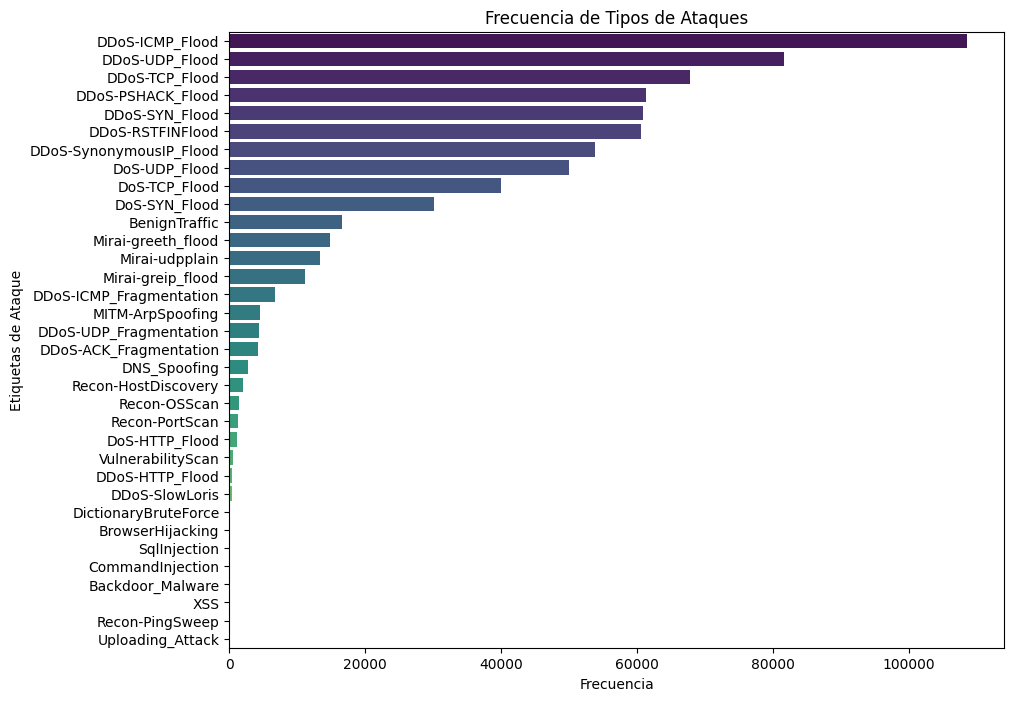

In [76]:
plt.figure(figsize=(10, 8))
sns.barplot(y=attack_counts.index, x=attack_counts.values, palette="viridis")
plt.title('Frecuencia de Tipos de Ataques')
plt.xlabel('Frecuencia')
plt.ylabel('Etiquetas de Ataque')
plt.show()

Para reducir la complejidad del análisis, hemos identificado una serie de patrones, por lo que vamos a realizar categorias para que sea mas sencillo la explicabilidad.

In [77]:
category_map1 = {
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'Recon-HostDiscovery': 'Recon',
    'Recon-PingSweep': 'Recon',
    'VulnerabilityScan': 'Recon',
    'MITM-ArpSpoofing': 'Malware',
    'BenignTraffic': 'Benign',
    'CommandInjection': 'Malware',
    'DNS_Spoofing': 'Malware',
    'BrowserHijacking': 'Malware',
    'DictionaryBruteForce': 'Malware',
    'SqlInjection': 'Malware',
    'XSS': 'Malware',
    'Backdoor_Malware': 'Malware',
    'Uploading_Attack': 'Malware',

}

df['Category'] = df['label'].map(category_map1)

Ahora vamos a comprobar cual es la frecuencia de cada una de las categorias (ya no son solo los distintos tipos de ataques, si no que es la categoria general)

In [78]:
df['Category'].value_counts()

Category
DDoS       511177
DoS        121271
Mirai       39346
Benign      16651
Malware      7873
Recon        5431
Name: count, dtype: int64

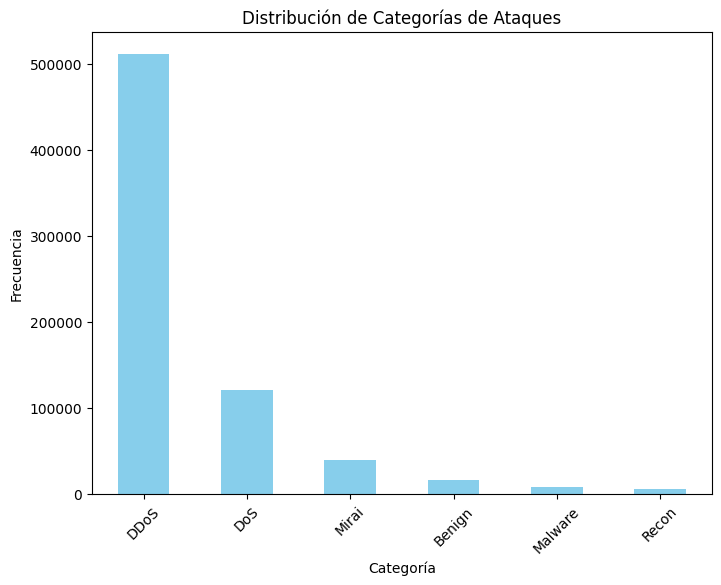

In [79]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Categorías de Ataques')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


Debido a que hay una categoria que es benigna, respecto al resto que entendemos que son malignas, hemos hecho un rapido analisis para ver si podiamos prescindir de esta categoria o si era muy relevante.

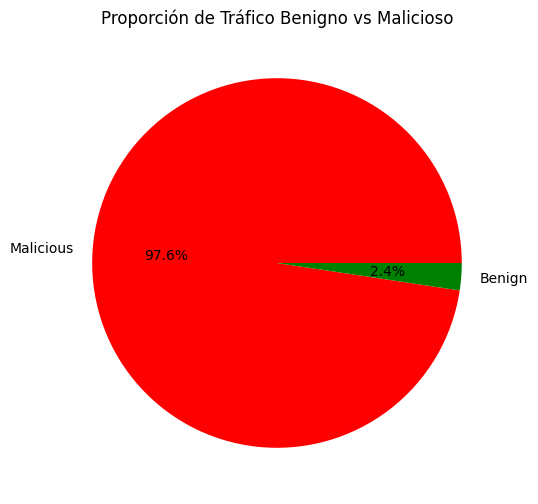

In [80]:
df['is_malicious'] = df['label'].apply(lambda x: 'Benign' if x == 'BenignTraffic' else 'Malicious')
benign_vs_malicious = df['is_malicious'].value_counts()

plt.figure(figsize=(6, 6))
benign_vs_malicious.plot(kind='pie', autopct='%1.1f%%', labels=['Malicious', 'Benign'], colors=['red', 'green'])
plt.title('Proporción de Tráfico Benigno vs Malicioso')
plt.ylabel('')
plt.show()


Al final no nos hemos animado a eliminar los ataques benignos por la falta de informacion

## Apartado 2: Estudio cuantitativo del dataset

Vamos a ver las distintas estadisticas que nos ofrece el describe de las columnas del tipo 'float' y de las que no sean numericas vamos a ver que valores unicos tiene, para hacernos una idea de que preprocesado podriamos llegar a necesitar

In [81]:
for i in df.columns:
  print(df[i].describe())

  if not df[i].dtype == "float64":
    print(df[i].unique())

  print("-"*50)

count    701749.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: IRC, dtype: float64
--------------------------------------------------
count    701749.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Telnet, dtype: float64
--------------------------------------------------
count    701749.000000
mean          0.000001
std           0.001194
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DHCP, dtype: float64
--------------------------------------------------
count    7.017490e+05
mean     9.124936e+03
std      1.011320e+05
min      0.000000e+00
25%      2.113841e+00
50%      1.587062e+01
75%      1.194457e+02
max      6.291456e+06
Name: Rate, dtype: float64
--------------------------------------------------
count    701749.000000
mean          0.

Observaciones:

1. Vemos que por ejemlo columnas como IRC, Telnet, cwr_flag_number, ece_flag_number o SMTP no tienen información que pueda ayudar al análisis, pues es todo 0's

In [82]:
list_useless_columns = ["IRC", "Telnet", "cwr_flag_number", "ece_flag_number", "SMTP"]
for i in list_useless_columns:
  print(df[i].unique())

[0.]
[0.]
[0.]
[0.]
[0.]


In [83]:
df.drop(columns=list_useless_columns, inplace=True)

Tambien vamos a mapear la columna 'is_malicious' a 1 si es malicioso el ataque o 0 si no lo es (benign)

In [84]:
df['is_malicious'].unique()

array(['Malicious', 'Benign'], dtype=object)

In [85]:
df['is_malicious'] = df['is_malicious'].map({'Malicious': 1, 'Benign': 0}).astype(int)

In [86]:
df.columns

Index(['DHCP', 'Rate', 'psh_flag_number', 'IPv', 'ARP', 'ack_flag_number',
       'HTTPS', 'LLC', 'ICMP', 'Tot size', 'Radius', 'Protocol Type', 'Weight',
       'rst_count', 'syn_count', 'UDP', 'fin_count', 'Magnitue', 'Number',
       'syn_flag_number', 'Srate', 'urg_count', 'Tot sum', 'ack_count', 'Std',
       'fin_flag_number', 'Max', 'Header_Length', 'TCP', 'Min', 'SSH', 'Drate',
       'AVG', 'DNS', 'HTTP', 'rst_flag_number', 'IAT', 'Covariance',
       'Duration', 'flow_duration', 'Variance', 'label', 'Category',
       'is_malicious'],
      dtype='object')

Hemos hecho una transformacion de la columna 'Category' en un formato binario (One-Hot Encoding).
Este paso es necesario para preparar los datos categóricos para algoritmos de aprendizaje automático, que requieren entradas numéricas. Utilizamos LabelBinarizer porque es una herramienta eficiente para manejar este tipo de transformación, asegurando que no exista una jerarquía implícita en las categorías.
La columna 'label' también se elimina para evitar redundancia en los datos.


In [87]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
# Asumiendo que df es tu DataFrame
encoded_data = encoder.fit_transform(df[['Category']])

# Crear un DataFrame con los resultados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.classes_)

# Concatenar el DataFrame original con el nuevo DataFrame de variables codificadas
df_encoded_label = pd.concat([df.drop(['label', 'Category'], axis=1), encoded_df], axis=1)


In [88]:
df_encoded_label

,DHCP,Rate,psh_flag_number,IPv,ARP,ack_flag_number,HTTPS,LLC,ICMP,Tot size,...,Duration,flow_duration,Variance,is_malicious,Benign,DDoS,DoS,Malware,Mirai,Recon
0,0.0,1.397840,0.0,1.0,0.0,0.0,0.0,1.0,0.0,588.14,...,63.78,0.000000,0.00,1,0,0,0,0,1,0
1,0.0,2.130290,1.0,1.0,0.0,1.0,0.0,1.0,0.0,54.00,...,64.00,0.000000,0.00,1,0,1,0,0,0,0
2,0.0,7.248154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,523.34,...,82.46,0.007771,0.40,1,0,0,0,0,1,0
3,0.0,4.346313,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.48,...,64.00,0.327774,0.17,1,0,0,1,0,0,0
4,0.0,8829.262382,0.0,1.0,0.0,0.0,0.0,1.0,0.0,52.90,...,65.91,0.100559,0.08,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,0.0,48.738956,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.00,...,64.00,0.000000,0.00,1,0,1,0,0,0,0
701745,0.0,19.220050,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.00,...,64.00,0.000000,0.00,1,0,1,0,0,0,0
701746,0.0,756.283226,0.0,1.0,0.0,0.0,0.0,1.0,0.0,938.00,...,64.00,0.109663,0.95,1,0,1,0,0,0,0
701747,0.0,18049.510038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,52.49,...,64.39,0.037309,0.19,1,0,1,0,0,0,0


Ahora vamos a ver Como de correlacionados estan los datos mediante la matriz de correlación.

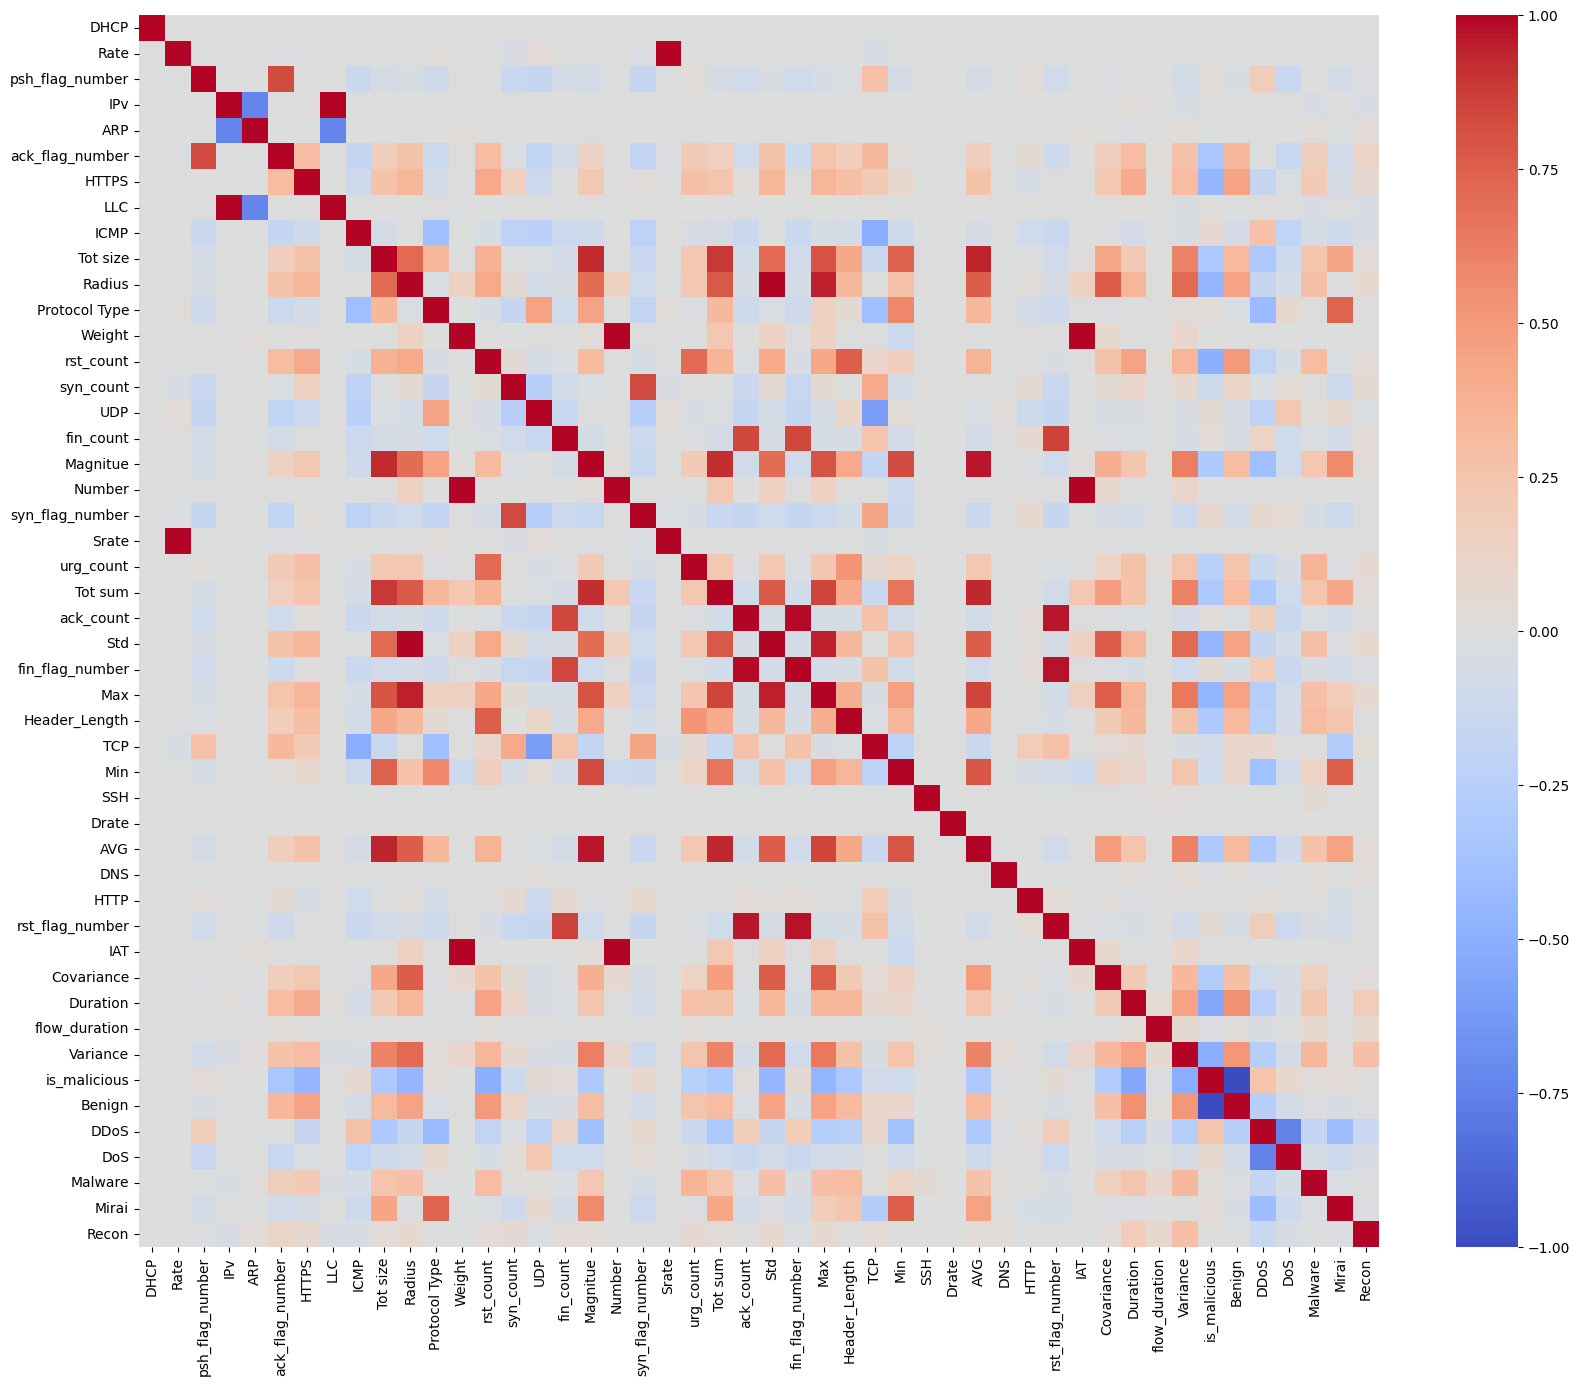

In [89]:
plt.close('all')  # Cierra todas las figuras abiertas

correlation_matrix = df_encoded_label.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()



Como hemos visto, la columnas DoS y DDoS podrian ir juntas ya que son inversamente correlacionadas. Esto nos ha dado la idea de hacer un segundo mapeo de categorias, pero al final no lo hemos escogido ya que mas adelante, no solo no nos mejoraba nada el accuracy sino que lo empeoraba un poco

In [90]:
category_map2 = {
    'Mirai-greeth_flood': 'DoS',
    'Mirai-greip_flood': 'DoS',
    'Mirai-udpplain': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'DDoS-ICMP_Flood': 'DoS',
    'DDoS-RSTFINFlood': 'DoS',
    'DDoS-UDP_Flood': 'DoS',
    'DDoS-PSHACK_Flood': 'DoS',
    'DDoS-SYN_Flood': 'DoS',
    'DDoS-TCP_Flood': 'DoS',
    'DDoS-HTTP_Flood': 'DoS',
    'DDoS-ICMP_Fragmentation': 'DoS',
    'DDoS-UDP_Fragmentation': 'DoS',
    'DDoS-ACK_Fragmentation': 'DoS',
    'DDoS-SynonymousIP_Flood': 'DoS',
    'DDoS-SlowLoris': 'DoS',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'Recon-HostDiscovery': 'Recon',
    'Recon-PingSweep': 'Recon',
    'VulnerabilityScan': 'Recon',
    'MITM-ArpSpoofing': 'Malware',
    'BenignTraffic': 'Benign',
    'CommandInjection': 'Injection',
    'DNS_Spoofing': 'Malware',
    'BrowserHijacking': 'Malware',
    'DictionaryBruteForce': 'Malware',
    'SqlInjection': 'Injection',
    'XSS': 'Injection',
    'Backdoor_Malware': 'Malware',
    'Uploading_Attack': 'Malware',
}


## Apartado 3: Reducción de dimensionalidad
Objetivo: lograr visualizaciones que mejor consigan separar los diferentes tipos de ataque de red entre si.

In [91]:
from sklearn.decomposition import PCA
#necesita estandarización centrada en 0 además
from sklearn.decomposition import TruncatedSVD
#bueno para datos dispersos y no necesita estandarización. La k es el numero de dimensiones en las que te las comprime
from sklearn.manifold import Isomap
#esto se basa en grafos para analizar hiperplanos, tiene pinta de tardar la puta vida en crear el grafo
#encia hace dijsktra para calcular los caminos más cortos, puede estar horas ejecutandose!!!!!!
#pero te permite ver en 2 o 3 dimensiones lo que ocupa n-dimensiones sin mucho cambio con mds
from sklearn.manifold import TSNE
#enfocado a representación en 2 o 3 dimensiones de los datos
#Aplicación de distribución sobre el espacio de alta dimensionalidad
#aplica distribuciones a los datos para deterinar la distancia entre puntos

In [92]:
df

,DHCP,Rate,psh_flag_number,IPv,ARP,ack_flag_number,HTTPS,LLC,ICMP,Tot size,...,HTTP,rst_flag_number,IAT,Covariance,Duration,flow_duration,Variance,label,Category,is_malicious
0,0.0,1.397840,0.0,1.0,0.0,0.0,0.0,1.0,0.0,588.14,...,0.0,0.0,8.367716e+07,0.000000,63.78,0.000000,0.00,Mirai-greeth_flood,Mirai,1
1,0.0,2.130290,1.0,1.0,0.0,1.0,0.0,1.0,0.0,54.00,...,0.0,0.0,8.333181e+07,0.000000,64.00,0.000000,0.00,DDoS-PSHACK_Flood,DDoS,1
2,0.0,7.248154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,523.34,...,0.0,0.0,8.365140e+07,18999.091436,82.46,0.007771,0.40,Mirai-greip_flood,Mirai,1
3,0.0,4.346313,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.48,...,0.0,1.0,8.297254e+07,0.570149,64.00,0.327774,0.17,DoS-SYN_Flood,DoS,1
4,0.0,8829.262382,0.0,1.0,0.0,0.0,0.0,1.0,0.0,52.90,...,0.0,0.0,8.301656e+07,2.071866,65.91,0.100559,0.08,DoS-UDP_Flood,DoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,0.0,48.738956,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.00,...,0.0,0.0,8.303769e+07,0.000000,64.00,0.000000,0.00,DDoS-TCP_Flood,DDoS,1
701745,0.0,19.220050,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.00,...,0.0,0.0,8.336199e+07,0.000000,64.00,0.000000,0.00,DDoS-SynonymousIP_Flood,DDoS,1
701746,0.0,756.283226,0.0,1.0,0.0,0.0,0.0,1.0,0.0,938.00,...,0.0,0.0,8.337042e+07,311678.811559,64.00,0.109663,0.95,DDoS-UDP_Fragmentation,DDoS,1
701747,0.0,18049.510038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,52.49,...,0.0,0.0,8.310303e+07,809.610955,64.39,0.037309,0.19,DDoS-UDP_Flood,DDoS,1


Aqui lo que estamos haciendo es estandarizar la columnas de X que lo necesiten a [-1,1], que nos va a servir para luego hacer la reduccion de dimensionalidad

In [93]:
from sklearn.preprocessing import StandardScaler
y = df[["label", "Category"]]
X = df.drop(columns=["label", "Category"])

In [94]:
for feature in X.columns:
  if not len(X[feature].unique()) == 2:
    X[feature] = StandardScaler().fit_transform(X=X[feature].to_numpy().reshape(-1, 1))

In [95]:
X

,DHCP,Rate,psh_flag_number,IPv,ARP,ack_flag_number,HTTPS,LLC,ICMP,Tot size,...,AVG,DNS,HTTP,rst_flag_number,IAT,Covariance,Duration,flow_duration,Variance,is_malicious
0,0.0,-0.090214,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.911885,...,1.932260,0.0,0.0,0.0,0.027995,-0.093565,-0.183685,-0.020561,-0.414083,1
1,0.0,-0.090207,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.292200,...,-0.292920,0.0,0.0,0.0,0.007813,-0.093565,-0.168048,-0.020561,-0.414083,1
2,0.0,-0.090156,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.644493,...,1.549372,0.0,0.0,0.0,0.026490,-0.035624,1.144066,-0.020535,1.298565,1
3,0.0,-0.090185,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.290219,...,-0.291116,0.0,0.0,1.0,-0.013182,-0.093563,-0.168048,-0.019472,0.313792,1
4,0.0,-0.002924,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.296739,...,-0.308332,0.0,0.0,0.0,-0.010609,-0.093559,-0.032287,-0.020227,-0.071554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,0.0,-0.089746,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.292200,...,-0.292920,0.0,0.0,0.0,-0.009375,-0.093565,-0.168048,-0.020561,-0.414083,1
701745,0.0,-0.090038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.292200,...,-0.292920,0.0,0.0,0.0,0.009577,-0.093565,-0.168048,-0.020561,-0.414083,1
701746,0.0,-0.082750,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.355553,...,3.110437,0.0,0.0,0.0,0.010070,0.856959,-0.168048,-0.020197,3.653457,1
701747,0.0,0.088247,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.298431,...,-0.279450,0.0,0.0,0.0,-0.005557,-0.091096,-0.140327,-0.020437,0.399425,1


#### (PCA) PRINCIPAL COMPONENT ANALYSIS

In [96]:
explained_v = []#luego ploteamos los resultados

n_comp = range(20, 1, -1)


for i in n_comp:
  print("\n",f"Probando con {i} componentes")
  pca = PCA(n_components=i)
  pca.fit(X)
  X_pca = pca.transform(X)

  # Imprimir la varianza explicada por cada componente principal
  print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
  # Calcular la varianza total explicada
  print("Varianza total explicada:", sum(pca.explained_variance_ratio_))
  explained_v.append(sum(pca.explained_variance_ratio_))


 Probando con 20 componentes
Varianza explicada por cada componente: [0.31104009 0.11871857 0.0869995  0.07734091 0.07584464 0.0665223
 0.04218947 0.0387605  0.03818208 0.03230097 0.02568732 0.01976321
 0.01491627 0.01032541 0.00759304 0.00652224 0.00617959 0.00391657
 0.00355823 0.00328724]
Varianza total explicada: 0.9896481531982603

 Probando con 19 componentes
Varianza explicada por cada componente: [0.31104009 0.11871857 0.0869995  0.07734091 0.07584464 0.0665223
 0.04218947 0.0387605  0.03818208 0.03230097 0.02568732 0.01976321
 0.01491627 0.01032541 0.00759304 0.00652224 0.00617959 0.00391657
 0.00355823]
Varianza total explicada: 0.9863609164373373

 Probando con 18 componentes
Varianza explicada por cada componente: [0.31104009 0.11871857 0.0869995  0.07734091 0.07584464 0.0665223
 0.04218947 0.0387605  0.03818208 0.03230097 0.02568732 0.01976321
 0.01491627 0.01032541 0.00759304 0.00652224 0.00617959 0.00391657]
Varianza total explicada: 0.9828026889956266

 Probando con 17

Análisis de la varianza explicada por las componentes principales:
Este análisis nos ayuda a determinar cuántas componentes principales son necesarias para conservar la mayor parte de la información original del dataset. 

Observaciones clave:
- La primera componente explica el 31.10% de la varianza total, mientras que las primeras 10 componentes explican el 88.79%.
- Si necesitamos conservar al menos el 95% de la varianza, debemos seleccionar al menos 14 componentes.
- En el caso de buscar simplificar aún más, con 8 componentes se retiene el 81.74% de la varianza.

Este análisis es esencial para balancear la precisión del modelo y la reducción de la complejidad.


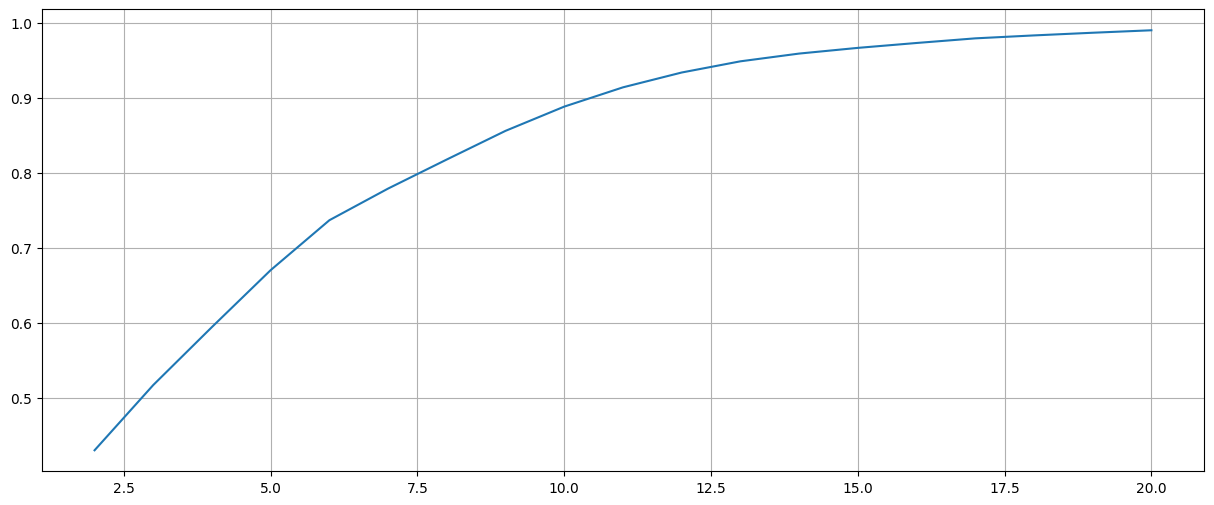

In [97]:
plt.figure(figsize=(15, 6))

sns.lineplot(y=explained_v, x=list(range(20,1,-1)), )

plt.grid(True)

#### TRUNCATED SVD

Ahora que hemos probado con PCA y nos ha dado aproximadamente un 99% de explicabilidad, vamos a probar con Truncated SVD

In [98]:
fexplained_v = []
n_comp = range(20,1,-1)

for i in n_comp:
  tSVD = TruncatedSVD(n_components=i, random_state=42)
  X_tSVD = tSVD.fit_transform(X)

  print("\n",f"Probando con {i} componentes")
  # Imprimir la varianza explicada por cada componente principal
  print("Varianza explicada por cada componente:", tSVD.explained_variance_ratio_)
  # Calcular la varianza total explicada
  print("Varianza total explicada:", sum(tSVD.explained_variance_ratio_))
  explained_v.append(sum(tSVD.explained_variance_ratio_))


 Probando con 20 componentes
Varianza explicada por cada componente: [0.31097225 0.00327432 0.11777424 0.08609507 0.07727689 0.07578776
 0.06643717 0.04170418 0.03875143 0.03818101 0.032194   0.0256849
 0.01976132 0.01486311 0.01007301 0.00756834 0.00651564 0.00614528
 0.00390506 0.00355567]
Varianza total explicada: 0.986520640235411

 Probando con 19 componentes
Varianza explicada por cada componente: [0.31097225 0.00327432 0.11777424 0.08609507 0.07727689 0.07578776
 0.06643717 0.04170418 0.03875143 0.03818101 0.032194   0.0256849
 0.01976132 0.01486311 0.01007301 0.00756834 0.00651564 0.00614528
 0.00390506]
Varianza total explicada: 0.9829649696407773

 Probando con 18 componentes
Varianza explicada por cada componente: [0.31097225 0.00327432 0.11777424 0.08609507 0.07727689 0.07578776
 0.06643717 0.04170418 0.03875143 0.03818101 0.032194   0.0256849
 0.01976132 0.01486311 0.01007301 0.00756834 0.00651564 0.00614528]
Varianza total explicada: 0.9790599074568811

 Probando con 17 

Este análisis de Truncated SVD muestra cómo se distribuye la varianza explicada por cada componente.

Observamos que la primera componente explica el 31.10% de la varianza, mientras que las siguientes tienen contribuciones mucho menores. La varianza acumulada nos permite determinar el número de componentes necesario para capturar una proporción significativa de la variabilidad de los datos.

En función de este análisis:
- Con 10 componentes se retiene el 85.62% de la varianza, lo cual puede ser un buen compromiso.
- Si se requiere conservar más del 95% de la varianza, necesitaremos al menos 14 componentes.

Este balance será clave para los próximos pasos, como la clasificación y las visualizaciones.


Nos daban mejores resultados usando PCA, pero son milesimas, por lo que vemos que reducir a 20 dimensiones sigue dando una explicabilidad muy buena, por lo que demomento mantenemos en 20 dimensiones.

In [99]:
# Asegurar longitudes iguales
n_comp = list(range(20, 1, -1))[:len(explained_v)]
explained_v = explained_v[:len(n_comp)]


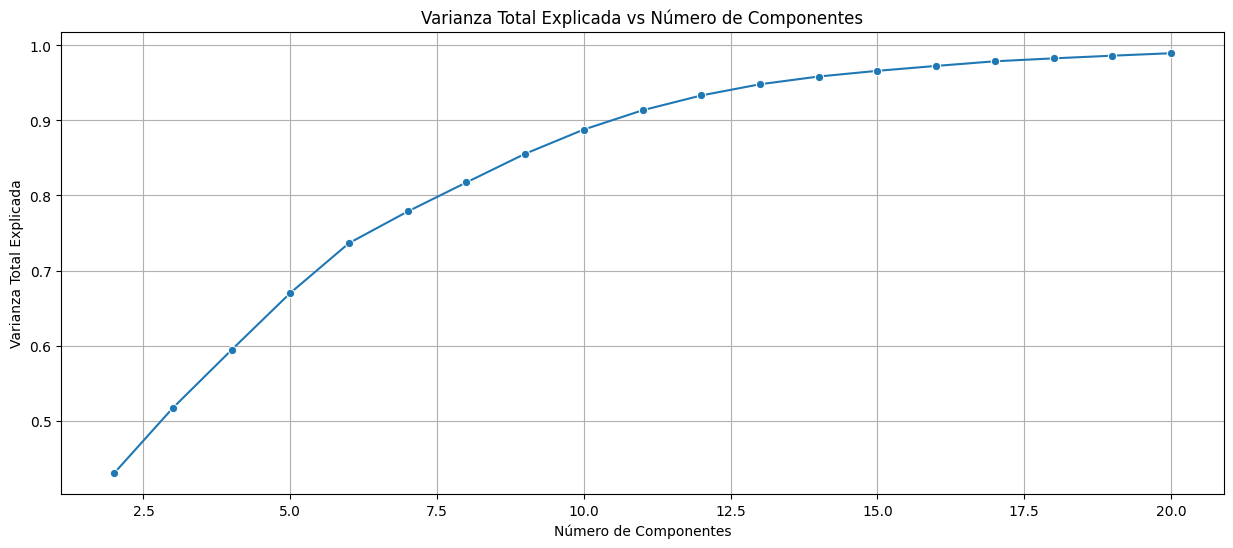

In [100]:
plt.figure(figsize=(15, 6))
sns.lineplot(y=explained_v, x=n_comp, marker='o')
plt.title('Varianza Total Explicada vs Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Total Explicada')
plt.grid(True)
plt.show()


vemos que avanza peor que PCA en cuanto a la varianza explicada. Ocurre lo mismo en cuanto a las predicciones, no valdría para poder visualizar facilmente los patrones, pero podría valer para hacer predicciones.

#### ISOMAP

In [101]:
import warnings
from scipy.sparse import SparseEfficiencyWarning
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Ignorar las advertencias de eficiencia de matrices dispersas
warnings.simplefilter('ignore', SparseEfficiencyWarning)


X_resampled, y_resampled = resample(X, y, n_samples=len(df)//100, random_state=42)


label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled["Category"])

In [102]:
iso = Isomap(n_neighbors=10, n_components=3)

X_iso = iso.fit_transform(X_resampled.copy())

/Users/andreesbenitoo/Desktop/AndreesBenitoo/2_Estudios/2_Universidad/1_Temario_Apuntes/4_Year(2024-2025)/7_semester/4_Métodos Clásicos de Predicción/MCP_Practica/practicaMCP_rinconbenito/.venv/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)


Aqui vamos a ver el label encoder de cada un de estos
Benign -> 0
DDos   -> 1
DoS    -> 2
Malware-> 3
Mirai  -> 4
Recon  -> 5

In [103]:
label_encoder.classes_

array(['Benign', 'DDoS', 'DoS', 'Malware', 'Mirai', 'Recon'], dtype=object)

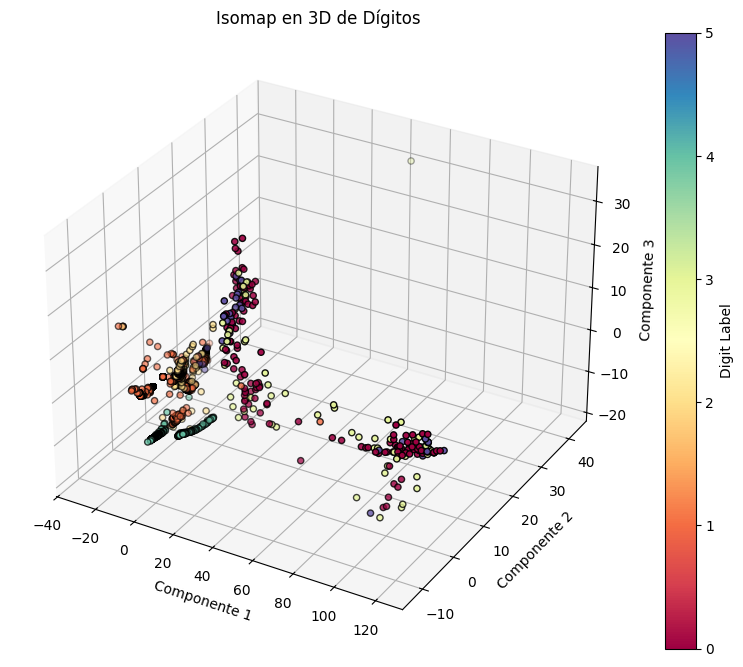

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Crear un plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(X_iso[:, 0], X_iso[:, 1], X_iso[:, 2], c=y_resampled_encoded, cmap='Spectral', edgecolor='k')

# Añadir una barra de colores
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Digit Label')

# Etiquetas de los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Título
ax.set_title('Isomap en 3D de Dígitos')

# Mostrar el gráfico
plt.show()


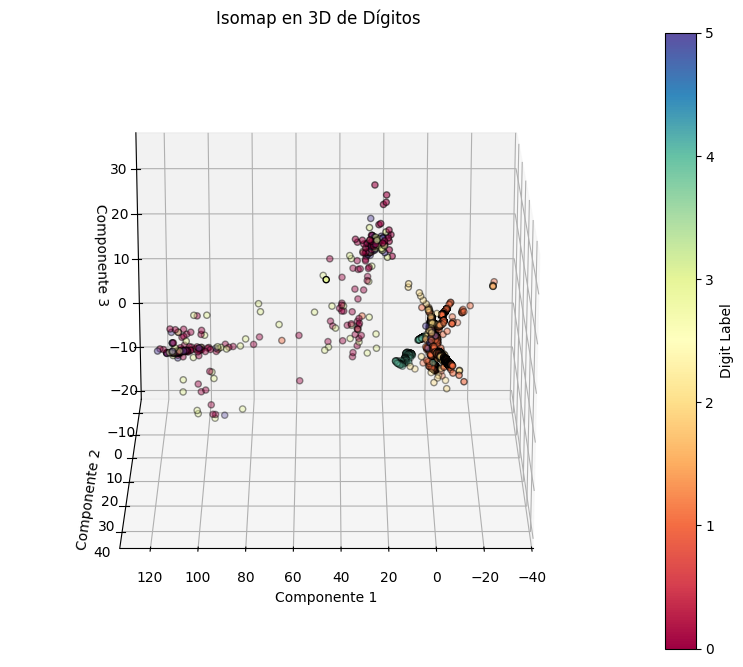

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear un plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Datos de ejemplo en X_iso y y_resampled_encoded
scatter = ax.scatter(X_iso[:, 0], X_iso[:, 1], X_iso[:, 2], c=y_resampled_encoded, cmap='Spectral', edgecolor='k')

# Añadir una barra de colores
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Digit Label')

# Etiquetas de los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Título
ax.set_title('Isomap en 3D de Dígitos')

# Ajustar la vista
ax.view_init(elev=20, azim=90)  # Modifica estos valores para cambiar la orientación de la vista

# Mostrar el gráfico
plt.show()


El objetivo de este análisis es visualizar cómo se agrupan las clases de ataques de red en un espacio tridimensional

Observaciones:
1. Se observan agrupamientos claros para algunas clases (por ejemplo, `Recon`).
2. Existe solapamiento entre otras clases (como `DDoS` y `DoS`), lo que puede indicar una dificultad en la separación.

Este análisis servirá como base para los siguientes pasos, como la clasificación o el ajuste de parámetros de reducción.


Los siguientes plots los hemos hecho para intentar entender un poco mejor los resultados

Text(0, 0.5, 'Componente 2')

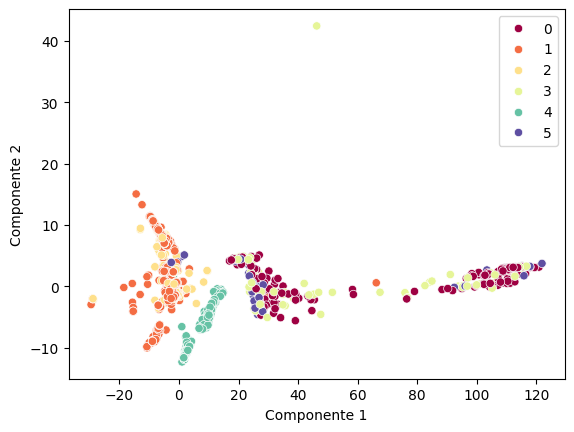

In [106]:
sns.scatterplot(x=X_iso[:, 0], y=X_iso[:, 1], hue=y_resampled_encoded, palette="Spectral")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

Text(0, 0.5, 'Componente 2')

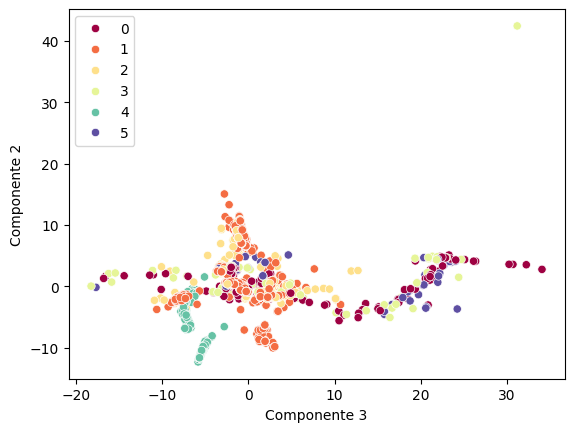

In [107]:
sns.scatterplot(x=X_iso[:, 2], y=X_iso[:,1], hue=y_resampled_encoded, palette="Spectral")
plt.xlabel('Componente 3')
plt.ylabel('Componente 2')

Text(0, 0.5, 'Componente 1')

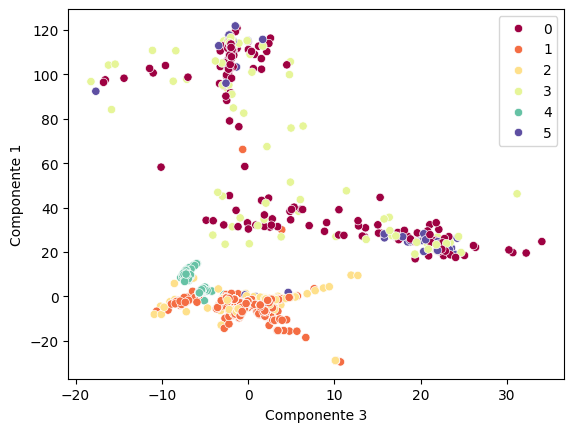

In [108]:
sns.scatterplot(x=X_iso[:, 2], y=X_iso[:, 0], hue=y_resampled_encoded, palette="Spectral")
plt.xlabel('Componente 3')
plt.ylabel('Componente 1')

#### TSNE

Ahora vamos a usar t-SNE que es una técnica de reducción de dimensionalidad no lineal, para representar los datos en un espacio de 3 dimensiones. A diferencia de métodos lineales como PCA, t-SNE es especialmente útil para visualizar datos complejos y descubrir patrones que no son evidentes en el espacio original. vamos a ver si conseguimos entender algo diferente que con ISOMAP

In [109]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=500, metric="correlation")

X_tsne = tsne.fit_transform(X_resampled.copy())

In [110]:
label_encoder.classes_

array(['Benign', 'DDoS', 'DoS', 'Malware', 'Mirai', 'Recon'], dtype=object)

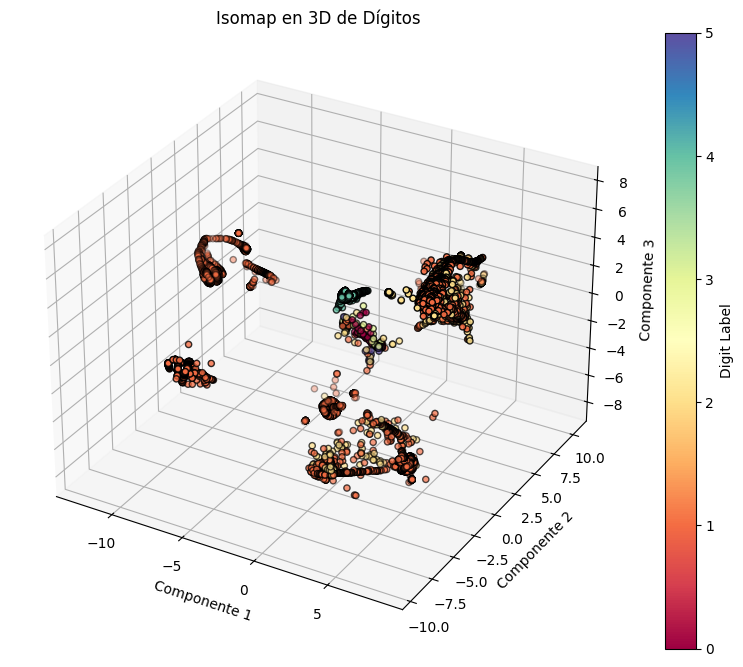

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Crear un plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_resampled_encoded, cmap='Spectral', edgecolor='k')

# Añadir una barra de colores
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Digit Label')

# Etiquetas de los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Título
ax.set_title('Isomap en 3D de Dígitos')

# Mostrar el gráfico
plt.show()


Text(0, 0.5, 'Componente t-SNE 2')

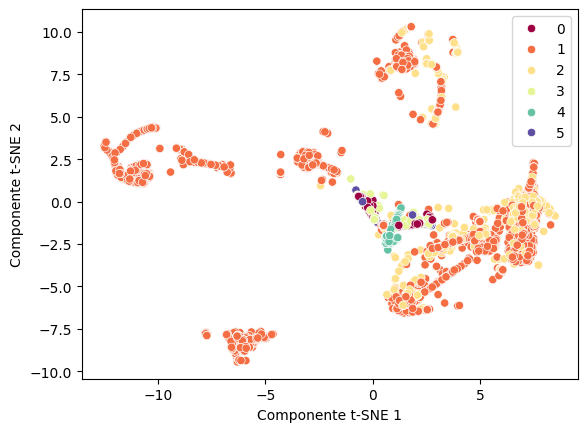

In [112]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:,1], hue=y_resampled_encoded, palette="Spectral")

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')

Text(0, 0.5, 'Componente t-SNE 2')

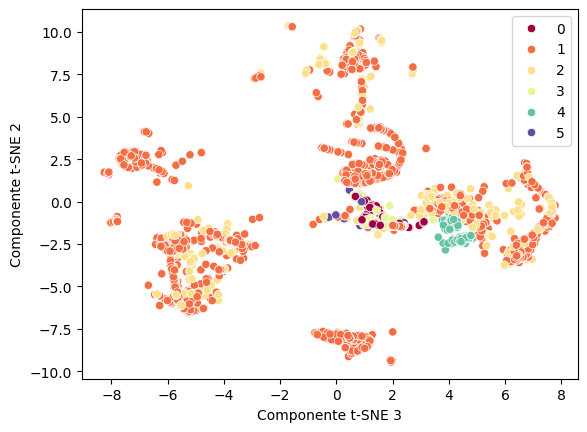

In [113]:
sns.scatterplot(x=X_tsne[:, 2], y=X_tsne[:,1], hue=y_resampled_encoded, palette="Spectral")

plt.xlabel('Componente t-SNE 3')
plt.ylabel('Componente t-SNE 2')

Text(0, 0.5, 'Componente t-SNE 3')

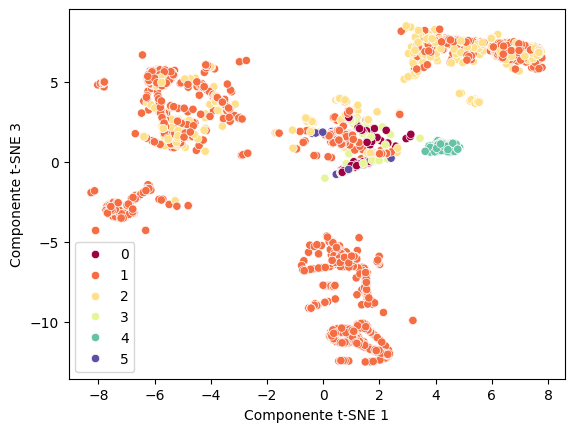

In [114]:

sns.scatterplot(x=X_tsne[:, 2], y=X_tsne[:,0], hue=y_resampled_encoded, palette="Spectral")

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 3')


aquí veríamos lo mismo que en el isomap, sino mejor, porque esto está pensado explicitamente para representación en 2 y 3 dimensiones de datasets de alta dimensionalidad

## Apartado 4: Comparación con distintos clasificadores de sk-learn

### LogisticRegresion Classifier

primero vamos a probar con las caracteristicas escaladas pero sin pasar ningun algoritmo de reduccion de dimensionalidad.

PCA

In [115]:
# Re-import necessary libraries after reset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [116]:
# Normalize the features
y = y['Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [117]:
# Prepare the results storage
results = []

# Step 1: Preprocess data
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Logistic Regression classifier
logistic_clf = LogisticRegression(max_iter=1000)


In [118]:

# Step 2: Evaluate on Original Data
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
results.append({
    "Dataset": "Original",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred, average='weighted')
})


In [119]:

# Step 3: PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logistic_clf.fit(X_train_pca, y_train)
y_pred_pca = logistic_clf.predict(X_test_pca)
results.append({
    "Dataset": "PCA",
    "Accuracy": accuracy_score(y_test, y_pred_pca),
    "Precision": precision_score(y_test, y_pred_pca, average='weighted'),
    "Recall": recall_score(y_test, y_pred_pca, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_pca, average='weighted')
})


In [120]:

# Step 4: Isomap
# iso = Isomap(n_neighbors=10, n_components=10)
# X_train_iso = iso.fit_transform(X_train)
# X_test_iso = iso.transform(X_test)

# logistic_clf.fit(X_train_iso, y_train)
# y_pred_iso = logistic_clf.predict(X_test_iso)
# results.append({
#     "Dataset": "Isomap",
#     "Accuracy": accuracy_score(y_test, y_pred_iso),
#     "Precision": precision_score(y_test, y_pred_iso, average='weighted'),
#     "Recall": recall_score(y_test, y_pred_iso, average='weighted'),
#     "F1-Score": f1_score(y_test, y_pred_iso, average='weighted')
# })


# no hemos conseguido que vaya


In [121]:

# Step 5: Truncated SVD
tsvd = TruncatedSVD(n_components=10, random_state=42)
X_train_tsvd = tsvd.fit_transform(X_train)
X_test_tsvd = tsvd.transform(X_test)

logistic_clf.fit(X_train_tsvd, y_train)
y_pred_tsvd = logistic_clf.predict(X_test_tsvd)
results.append({
    "Dataset": "SVD",
    "Accuracy": accuracy_score(y_test, y_pred_tsvd),
    "Precision": precision_score(y_test, y_pred_tsvd, average='weighted'),
    "Recall": recall_score(y_test, y_pred_tsvd, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_tsvd, average='weighted')
})



In [122]:
# Convert results to DataFrame for comparison
df_results = pd.DataFrame(results)

print(df_results)

    Dataset  Accuracy  Precision    Recall  F1-Score
0  Original  0.852483   0.855036  0.852483  0.817084
1       PCA  0.820425   0.825191  0.820425  0.757432
2       SVD  0.822567   0.826010  0.822567  0.762240


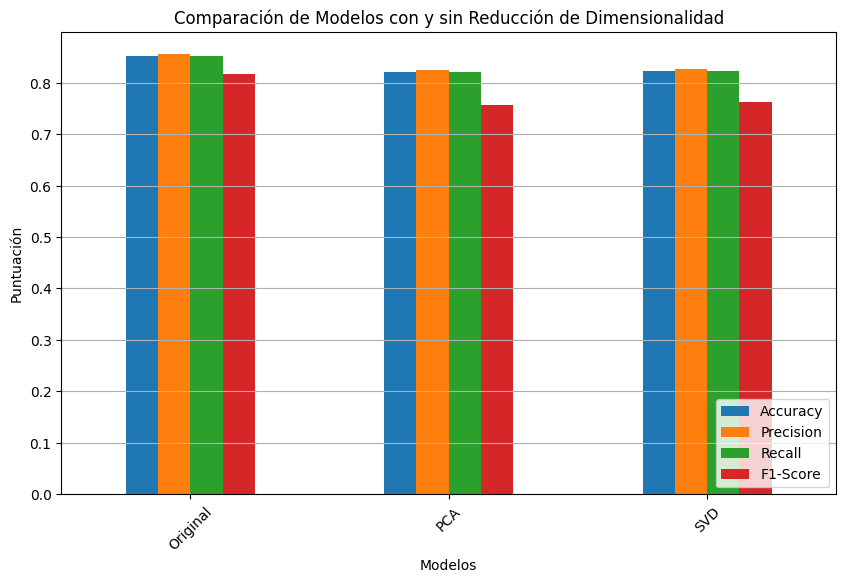

In [123]:
df_results.set_index("Dataset").plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Modelos con y sin Reducción de Dimensionalidad")
plt.ylabel("Puntuación")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.show()


###  Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
# Prepare results storage
rf_results = []

In [126]:
# Step 1: Evaluate on Original Data
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
rf_results.append({
    "Dataset": "Original",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred, average='weighted')
})


In [127]:
# Step 2: PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rf_clf.fit(X_train_pca, y_train)
y_pred_pca = rf_clf.predict(X_test_pca)
rf_results.append({
    "Dataset": "PCA",
    "Accuracy": accuracy_score(y_test, y_pred_pca),
    "Precision": precision_score(y_test, y_pred_pca, average='weighted'),
    "Recall": recall_score(y_test, y_pred_pca, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_pca, average='weighted')
})

In [128]:
# Step 3: Isomap
# iso = Isomap(n_neighbors=10, n_components=10)
# X_train_iso = iso.fit_transform(X_train)
# X_test_iso = iso.transform(X_test)
# rf_clf.fit(X_train_iso, y_train)
# y_pred_iso = rf_clf.predict(X_test_iso)
# rf_results.append({
#     "Dataset": "Isomap",
#     "Accuracy": accuracy_score(y_test, y_pred_iso),
#     "Precision": precision_score(y_test, y_pred_iso, average='weighted'),
#     "Recall": recall_score(y_test, y_pred_iso, average='weighted'),
#     "F1-Score": f1_score(y_test, y_pred_iso, average='weighted')
# })

In [129]:
# Step 4: Truncated SVD
tsvd = TruncatedSVD(n_components=10, random_state=42)
X_train_tsvd = tsvd.fit_transform(X_train)
X_test_tsvd = tsvd.transform(X_test)
rf_clf.fit(X_train_tsvd, y_train)
y_pred_tsvd = rf_clf.predict(X_test_tsvd)
rf_results.append({
    "Dataset": "SVD",
    "Accuracy": accuracy_score(y_test, y_pred_tsvd),
    "Precision": precision_score(y_test, y_pred_tsvd, average='weighted'),
    "Recall": recall_score(y_test, y_pred_tsvd, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_tsvd, average='weighted')
})

In [130]:
df_rf_results = pd.DataFrame(rf_results)

print(df_rf_results)

    Dataset  Accuracy  Precision    Recall  F1-Score
0  Original  0.991664   0.991803  0.991664  0.989997
1       PCA  0.862173   0.880426  0.862173  0.831084
2       SVD  0.861703   0.879572  0.861703  0.830452


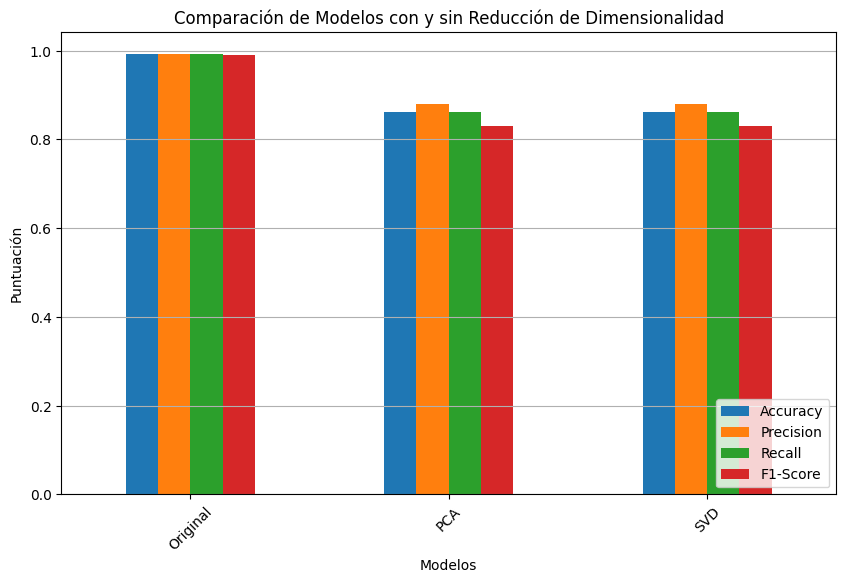

In [131]:
df_rf_results.set_index("Dataset").plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Modelos con y sin Reducción de Dimensionalidad")
plt.ylabel("Puntuación")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.show()

### KNeighborsClassifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_results = []

In [133]:
# Step 1: Evaluate on Original Data
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
knn_results.append({
    "Dataset": "Original",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred, average='weighted')
})

In [134]:
# Step 2: PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_clf.fit(X_train_pca, y_train)
y_pred_pca = knn_clf.predict(X_test_pca)
knn_results.append({
    "Dataset": "PCA",
    "Accuracy": accuracy_score(y_test, y_pred_pca),
    "Precision": precision_score(y_test, y_pred_pca, average='weighted'),
    "Recall": recall_score(y_test, y_pred_pca, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_pca, average='weighted')
})

In [135]:
# Step 3: Isomap
# iso = Isomap(n_neighbors=10, n_components=10)
# X_train_iso = iso.fit_transform(X_train)
# X_test_iso = iso.transform(X_test)
# knn_clf.fit(X_train_iso, y_train)
# y_pred_iso = knn_clf.predict(X_test_iso)
# knn_results.append({
#     "Dataset": "Isomap",
#     "Accuracy": accuracy_score(y_test, y_pred_iso),
#     "Precision": precision_score(y_test, y_pred_iso, average='weighted'),
#     "Recall": recall_score(y_test, y_pred_iso, average='weighted'),
#     "F1-Score": f1_score(y_test, y_pred_iso, average='weighted')
# })

In [136]:
# Step 4: Truncated SVD
tsvd = TruncatedSVD(n_components=10, random_state=42)
X_train_tsvd = tsvd.fit_transform(X_train)
X_test_tsvd = tsvd.transform(X_test)
knn_clf.fit(X_train_tsvd, y_train)
y_pred_tsvd = knn_clf.predict(X_test_tsvd)
knn_results.append({
    "Dataset": "SVD",
    "Accuracy": accuracy_score(y_test, y_pred_tsvd),
    "Precision": precision_score(y_test, y_pred_tsvd, average='weighted'),
    "Recall": recall_score(y_test, y_pred_tsvd, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_tsvd, average='weighted')
})

In [137]:
df_knn_results = pd.DataFrame(knn_results)

print(df_knn_results)

    Dataset  Accuracy  Precision    Recall  F1-Score
0  Original  0.958366   0.957839  0.958366  0.957951
1       PCA  0.954941   0.954216  0.954941  0.954301
2       SVD  0.954960   0.954235  0.954960  0.954320


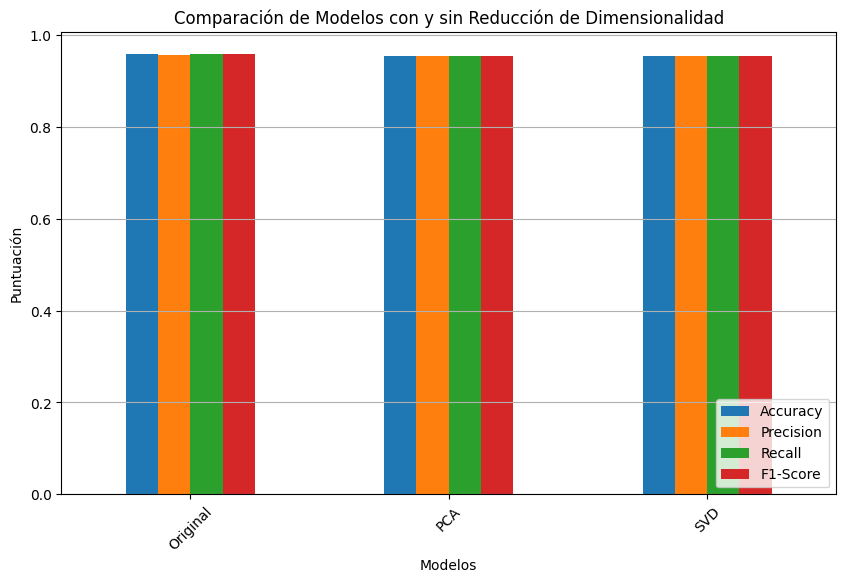

In [138]:
df_knn_results.set_index("Dataset").plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Modelos con y sin Reducción de Dimensionalidad")
plt.ylabel("Puntuación")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.show()